**Formules de Black et Scholes:**

0) *Librairies Python:*

In [11]:
from math import sqrt, log, exp
from scipy.stats import norm
import matplotlib.pyplot as plt

1) *Formule du call*

In [5]:
def d_plus(t, S, T, K, r, q, sigma):
    return (1/(sigma*sqrt(T-t)))*(log(S/K)+(r-q+0.5*sigma**2)*(T-t)) + 0.5*sigma*sqrt(T-t)

def d_minus(t, S, T, K, r, q, sigma):
    return d_plus(t, S, T, K, r, q, sigma) - sigma*sqrt(T-t)

def Call_price_BS(t, S, T, K, r, q, sigma):
    return S*exp(-q*(T-t))*norm.cdf(d_plus(t, S, T, K, r, q, sigma)) - K*exp(-r*(T-t))*norm.cdf(d_minus(t, S, T, K, r, q, sigma))


In [10]:
#test:

S, K, r, q, sigma = 100, 100, 0, 0, 0.2
T = 1
t = 0

print(f"Prix obtenu par la formule de Black-Scholes: {Call_price_BS(t, S, T, K, r, q, sigma)}")

print(f"Prix obtenu par l'approximation ATM: {0.4*S*sigma*sqrt(T-t)}")

Prix obtenu par la formule de Black-Scholes: 7.9259709439103005
Prix obtenu par l'approximation ATM: 8.0


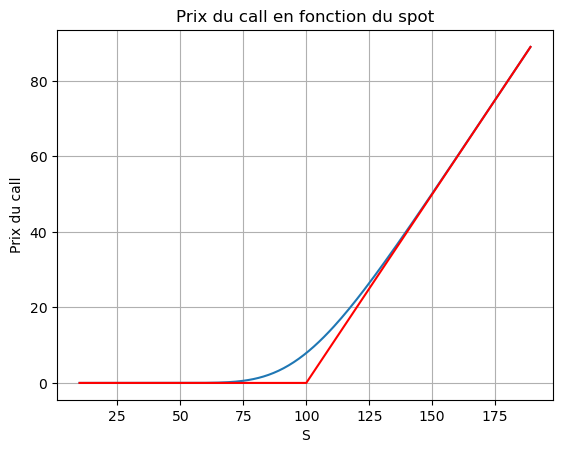

In [19]:
S = [i for i in range(10, 190)]
prices = [Call_price_BS(t, s, T, K, r, q, sigma) for s in S]

plt.plot(S, prices)
plt.plot(S, [max(s - K, 0) for s in S], 'r')
plt.xlabel("S")
plt.ylabel("Prix du call")
plt.title("Prix du call en fonction du spot")
plt.grid()

2) *Les grecques*

In [ ]:
def delat_BS(t, S, T, K, r, q, sigma):
    return exp(-q*(T-t))*norm.cdf(d_plus(t, S, T, K, r, q, sigma))

def gamma_BS(t, S, T, K, r, q, sigma):
    return exp(-q*(T-t))*norm.pdf(d_plus(t, S, T, K, r, q, sigma))/(S*sigma*sqrt(T-t))

def theta_BS(t, S, T, K, r, q, sigma):
    dmin = d_minus(t, S, T, K, r, q, sigma)
    dplus = d_plus(t, S, T, K, r, q, sigma)
    return -S*exp(-q*(T-t))*norm.pdf(dplus)*sigma/(2*sqrt(T-t)) - r*K*exp(-r*(T-t))*norm.cdf(dmin) + q*S*exp(-q*(T-t))*norm.cdf(dplus)

def vega_BS(t, S, T, K, r, q, sigma):
    return S*exp(-q*(T-t))*norm.pdf(d_plus(t, S, T, K, r, q, sigma))*sqrt(T-t)

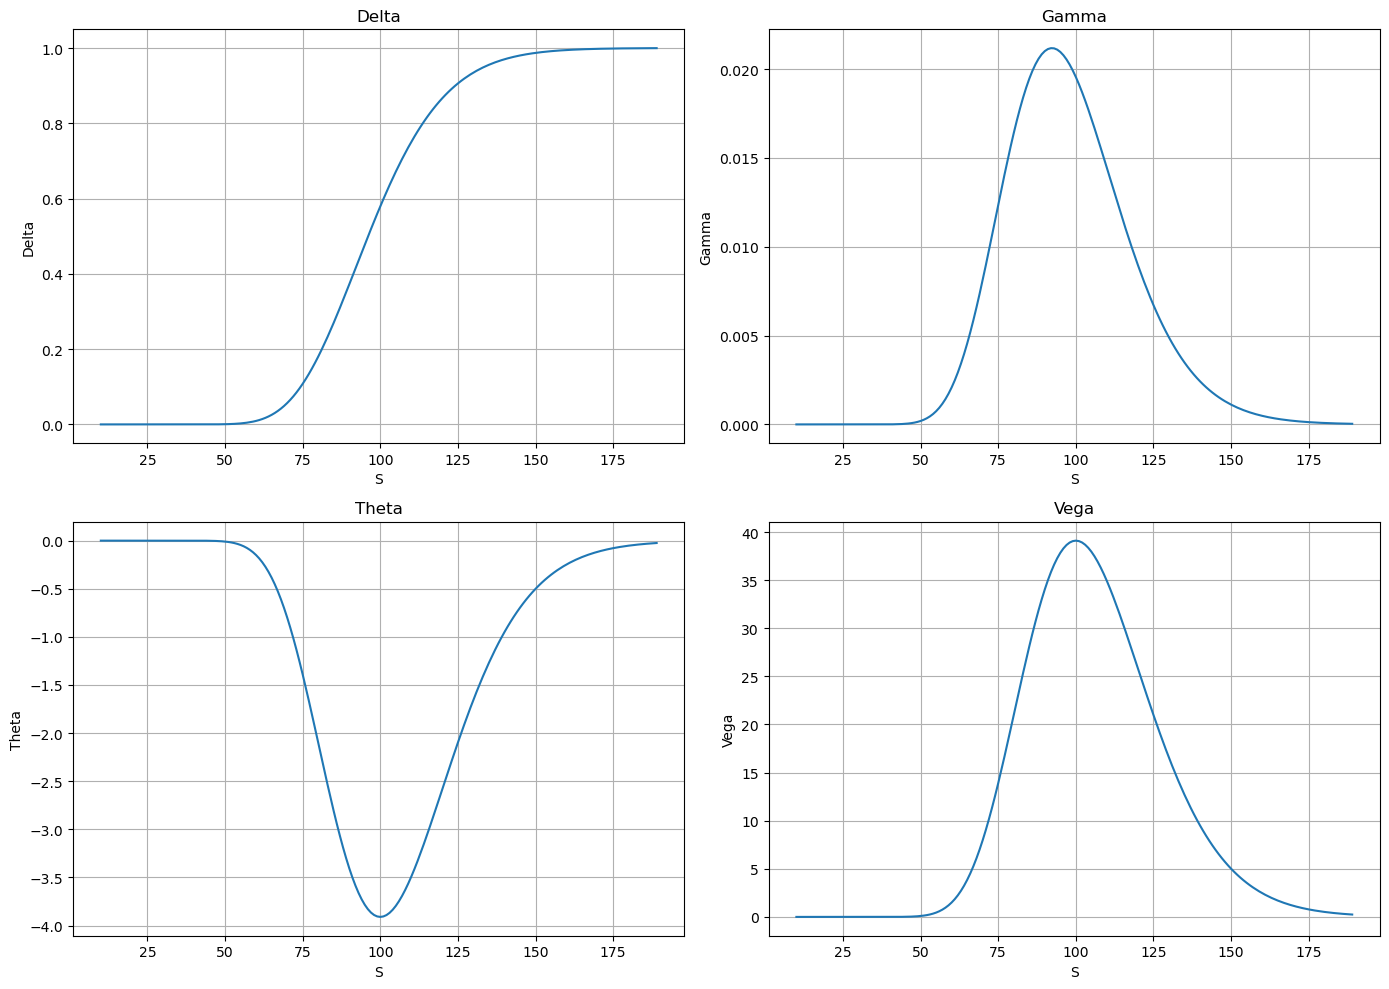

In [27]:
delta_values = [delat_BS(t, s, T, K, r, q, sigma) for s in S]
gamma_values = [gamma_BS(t, s, T, K, r, q, sigma) for s in S]
theta_values = [theta_BS(t, s, T, K, r, q, sigma) for s in S]
vega_values = [vega_BS(t, s, T, K, r, q, sigma) for s in S]

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
for ax in axs.flat:
    ax.grid(True)

axs[0, 0].plot(S, delta_values)
axs[0, 0].set_title('Delta')
axs[0, 0].set_xlabel('S')
axs[0, 0].set_ylabel('Delta')

axs[0, 1].plot(S, gamma_values)
axs[0, 1].set_title('Gamma')
axs[0, 1].set_xlabel('S')
axs[0, 1].set_ylabel('Gamma')

axs[1, 0].plot(S, theta_values)
axs[1, 0].set_title('Theta')
axs[1, 0].set_xlabel('S')
axs[1, 0].set_ylabel('Theta')

axs[1, 1].plot(S, vega_values)
axs[1, 1].set_title('Vega')
axs[1, 1].set_xlabel('S')
axs[1, 1].set_ylabel('Vega')

plt.tight_layout()
plt.show()